# WORKSHOP 2

------------

**<u>GRUPO 4<u>**

Digital House

link git hub: https://github.com/grupo4dhds/grupo4_git.git

--------------

## CONTENIDO


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
def lista_featurend(X, label_i):
    for i in range(len(X.columns)):
        if list(X.columns)[i] == label_i:
            lista_featur_end = (list(X.columns)[i:])
    return lista_featur_end
        
def cambia_nombre_columnas(data, **kwarg):
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
    for key in kwarg.keys():
        data.rename(kwarg[key], axis=1, inplace=True)
    return data

def cambia_orden_columnas(check_list, data, safe=1): # safe: es para conservar la primera columna con indice[0]
    label_list = list(data.columns)
    for i in range(len(check_list)):
        label_list.remove(check_list[i])
        label_list.insert(i+safe, check_list[i])
        data = data.reindex(label_list, axis=1)
        
def data_info(data, name='data'):
    df = pd.DataFrame(pd.Series(data.columns))
    df.columns = ['columna']
    df.columns.name = f'df de {name}'
    df.index.name = 'index'
    df['Nan'] = data.isna().sum().values
    df['dtype']  = data.dtypes.values
    df['count'] = data.count().values
    df['pct_nan'] = round(df['Nan']/data.shape[0]*100,2)
    df['count_unique'] = [len(data[elemento].value_counts()) for elemento in data.columns]
    return df


def visualizacion_dos_scatter(frame1, frame2, x, y_1, y_2):
    x1 = frame1[x]
    x2 = frame2[x]
    y_real = frame1[y_1]
    y_pred = frame2[y_2]
    plt.scatter(x1, y_real)
    plt.scatter(x2, y_pred) # muestra, entonces com
    plt.suptitle('y, y_pred');
    
    
    ax = plt.axes() #instancia de un objeto
    # tiene atributos y tiene métodos
    # los atributos .algo y los métodos son .algo()
    # 
    ax.set(xlabel = 'x', ylabel='price')
    #azules reales
    #naranjas predichos
    

    """
dame dos datasets, ya filtrados

# separame el eje x, de cualquier de los dos datasets
# armame una serie de cada valor real/predicho
""";
def variables_feature(frame):
    frame['sup_total_pow2'] = frame.surface_total_in_m2 * frame.surface_total_in_m2
    frame['sup_descubierta'] = frame.surface_total_in_m2 - frame.surface_covered_in_m2
    frame['sup_descubierta_pct'] = frame.sup_descubierta / frame.surface_total_in_m2 *100
    frame = frame.drop('sup_descubierta', axis=1)
    return frame

In [3]:
data = pd.read_csv('data_apartment_5_final.csv')
data.drop(list(data.columns)[0], axis=1, inplace=True)
lista_columnas_1 = list(data.columns)[:9]
lista_columnas_2 = lista_featurend(data,'above_mean')
print(lista_columnas_1)
print(lista_columnas_2)
data = data.loc[:,lista_columnas_1 + lista_columnas_2]

Dicto = {}

['property_type', 'place_name', 'state_name', 'price', 'currency', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'place_name_2']
['above_mean', 'above_median']


In [4]:
df = data_info(data)
df

df de data,columna,Nan,dtype,count,pct_nan,count_unique
index,,,,,,
0,property_type,0,object,15942,0.00,1
1,place_name,0,object,15942,0.00,113
2,state_name,0,object,15942,0.00,5
3,price,0,float64,15942,0.00,2671
4,currency,0,object,15942,0.00,1
5,surface_total_in_m2,3198,float64,12744,20.06,168
6,surface_covered_in_m2,746,float64,15196,4.68,191
7,price_usd_per_m2,0,float64,15942,0.00,6332
8,place_name_2,0,object,15942,0.00,51


In [5]:
lista_not_na = list((df[df.Nan == 0].columna).values)
lista_con_na = list((df[df.Nan != 0].columna).values)

In [6]:
print ('ANALISIS DE NANS')
print (data[lista_con_na].isna().sum().to_string())
print ('La suma es {}'.format(3198+746))
print ('Cantidad de elemento: {}'.format(data[lista_con_na].shape[0]))

print ('Interseccion entre los nan encuentra: {} elementos'.format(data[lista_con_na].isna().all(axis=1).sum()))
print('Union entre los nan encuentra: {} elementos'.format(data[lista_con_na].isna().any(axis=1).sum()))

print ('\nSe toma muestra de los valores y se los quita del dataset')

muestra = data[data[lista_con_na].isna().any(axis=1)]
df = data_info(muestra, 'surface_nan')
data = data.drop(muestra.index)

Dicto['data_cruda'] = data.to_dict(), data_info(data).to_dict()
Dicto['surface_nan'] = muestra.to_dict(), df.to_dict()

ANALISIS DE NANS
surface_total_in_m2      3198
surface_covered_in_m2     746
La suma es 3944
Cantidad de elemento: 15942
Interseccion entre los nan encuentra: 0 elementos
Union entre los nan encuentra: 3944 elementos

Se toma muestra de los valores y se los quita del dataset


In [7]:
data

,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,place_name_2,above_mean,above_median
0,apartment,Mataderos,Capital Federal,72000.0,USD,55.0,55.0,1309.090909,Mataderos,0.0,1.0
1,apartment,Mataderos,Capital Federal,67000.0,USD,40.0,28.0,1675.000000,Mataderos,0.0,0.0
2,apartment,Mataderos,Capital Federal,90000.0,USD,52.0,48.0,1730.769231,Mataderos,0.0,1.0
3,apartment,Mataderos,Capital Federal,88000.0,USD,50.0,38.0,1760.000000,Mataderos,0.0,0.0
4,apartment,Mataderos,Capital Federal,93600.0,USD,51.0,46.0,1835.294118,Mataderos,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15937,apartment,El Palomar,Bs.As. G.B.A. Zona Oeste,77000.0,USD,40.0,40.0,1925.000000,otros,0.0,0.0
15938,apartment,El Palomar,Bs.As. G.B.A. Zona Oeste,77000.0,USD,40.0,40.0,1925.000000,otros,0.0,0.0
15939,apartment,El Palomar,Bs.As. G.B.A. Zona Oeste,75000.0,USD,40.0,40.0,1875.000000,otros,0.0,0.0
15940,apartment,El Palomar,Bs.As. G.B.A. Zona Oeste,140000.0,USD,80.0,80.0,1750.000000,otros,1.0,1.0


In [8]:
data = variables_feature(data)

dummy_place = pd.get_dummies(data['place_name_2'], drop_first=True)
df = data_info(dummy_place)['columna']

data = data.drop('place_name_2', axis=1)

Dicto['data'] = data_info(data).to_dict(), data.to_dict()
Dicto['dummy_place'] = df.to_dict(), dummy_place.to_dict()

In [ ]:
data

In [9]:
print (pd.Series(data.columns).to_string())

0             property_type
1                place_name
2                state_name
3                     price
4                  currency
5       surface_total_in_m2
6     surface_covered_in_m2
7          price_usd_per_m2
8                above_mean
9              above_median
10           sup_total_pow2
11      sup_descubierta_pct


In [10]:
# 1. Seleccion de la clase de modelo
from sklearn.linear_model import LinearRegression

# 2. Elegir los hiperparámetros del modelo
linreg = LinearRegression(normalize=True) # False: default but then change to True and see changes

#3. Preparar los datos en una matriz de features, y un vector target

features_1 = ['surface_total_in_m2', 'sup_total_pow2', 'sup_descubierta_pct', 'above_mean']
features_2 = ['surface_total_in_m2', 'sup_total_pow2', 'sup_descubierta_pct', 'above_median']

X = data[features_1]
X = pd.concat([X,dummy_place], axis=1)


y = data.price
y = y[y.index.intersection(X.index)]

#4. Separar los sets de entrenamiento y de testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

#5. Ajustar el modelo a los datos de entrenamiento
linreg.fit(Xtrain, ytrain)

#6. Predecir etiquetas para datos desconocidos
y_pred = linreg.predict(Xtest)

#7. Evaluar la perfomance del modelo

from sklearn import metrics

print ('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print ('MSE:', metrics.mean_squared_error(ytest, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print ('R2:', metrics.r2_score(ytest, y_pred))

MAE: 26105.609540740712
MSE: 1266840578.3410313
RMSE: 35592.70400434661
R2: 0.828237097073263


In [11]:
#import statsmodels as sm # error
#help(LinearRegression)
#help(LinearRegression.predict)
#help(sm.fittedvalues) # no logro hacerlo funcionar proviene de la notebook de dani
"""
    VALORES CON valor=84, valor: cantidad de publicaciones minimas para conservar place_name
Normalize: False (no varía si se cambia a True)
MAE: 26388.597029743163
MSE: 1290767140.9256575
RMSE: 35927.247889668055
R2: 0.8201073191954292

    VALORES CON valor=63
    feature_1
MAE: 26105.609540740712
MSE: 1266840578.3410313
RMSE: 35592.70400434661
R2: 0.828237097073263
    VALORES CON valor=63
    feature_2
MAE: 26093.385049955825
MSE: 1266894552.180633
RMSE: 35593.462211207174
R2: 0.8282297791016645
    diferencia
f2-f1 (MAE) = -12
f2-f1 (MSE) = 53.974 (elegimos feature 1)
f2-f1 (RMSE) = 1
f2-f1 (R2) = -0,000008

(wrong!)    VALORES = 63 : otros
    feature_1
    select: surface_covered_in_m2
MAE: 25885.978562020075
MSE: 1286649928.941028
RMSE: 35869.90282870903
R2: 0.8255512724933425

""";

--------------------
**EVALUACION VISUAL DEL MODELO CON DATOS DE OTRA MUESTRA PERO QUE SEAN REPRESENTATIVOS DE ESTA**

In [12]:
data_aux = pd.DataFrame(Dicto['data'][1])

features_1
lista = []
for i in range(len(list(data_aux.columns))):
    booleano = False
    for j in range(len(features_1)):
        elemento = features_1[j] in list(data_aux.columns)[i]
        if elemento: 
            booleano = True            
    lista.append(booleano)
    
not_features_1 = []
for i in range(len(lista)):
    if lista[i] == False:
        not_features_1.append(list(data_aux.columns)[i])
        
data_aux = data_aux[not_features_1]
data_aux = data_aux.drop('above_median', axis=1)

data_aux.head(1)

,property_type,place_name,state_name,price,currency,surface_covered_in_m2,price_usd_per_m2
0,apartment,Mataderos,Capital Federal,72000.0,USD,55.0,1309.090909


In [13]:
data = data[features_1]
data = pd.concat([data,dummy_place], axis=1)
array_predict = linreg.predict(data)
data['y_pred'] = array_predict
data.head(1)

,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,above_mean,Acassuso,Adrogué,Balvanera,Banfield,Barracas,Barrio Los Alisos,...,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón,Wilde,otros,y_pred
0,55.0,3025.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123285.839271


In [14]:
data = pd.concat([data_aux,data], axis=1)
data.head(1)


,property_type,place_name,state_name,price,currency,surface_covered_in_m2,price_usd_per_m2,surface_total_in_m2,sup_total_pow2,sup_descubierta_pct,...,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón,Wilde,otros,y_pred
0,apartment,Mataderos,Capital Federal,72000.0,USD,55.0,1309.090909,55.0,3025.0,0.0,...,0,0,0,0,0,0,0,0,0,123285.839271


C:\Users\aguST\AppData\Local\Temp/ipykernel_6948/3342714912.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes() #instancia de un objeto


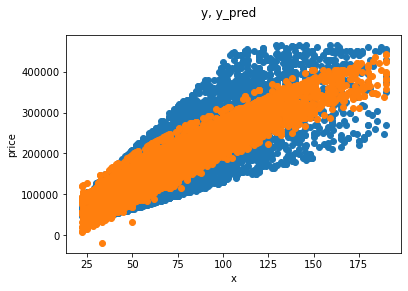

In [15]:
visualizacion_dos_scatter(data,data,'surface_total_in_m2', 'price','y_pred')

--------------------
EXPLORACION DE LA MUESTRA

In [16]:
serie_same = pd.Series(Dicto['dummy_place'][0])
serie_same

0              Acassuso
1               Adrogué
2             Balvanera
3              Banfield
4              Barracas
5     Barrio Los Alisos
6          Barrio Norte
7                Beccar
8               Canning
9       Capital Federal
10              Caseros
11             Castelar
12               Centro
13            Chacarita
14              Coghlan
15           Colegiales
16               Flores
17             Floresta
18              Florida
19               Güemes
20             La Plata
21          Las Cañitas
22              Liniers
23             Martínez
24            Mataderos
25                Nuñez
26                 Once
27              Palermo
28    Palermo Hollywood
29         Palermo Soho
30     Parque Chacabuco
31     Parque Patricios
32             Paternal
33          Plaza Mitre
34             Recoleta
35               Retiro
36             Saavedra
37           San Isidro
38            San Justo
39           San Miguel
40          San Nicolás
41       Santos 

In [17]:
muestra = pd.read_csv('muestra_currency_nan.csv')
muestra = muestra.drop(list(muestra.columns)[0], axis=1)
mask_1 = muestra.property_type == 'apartment'
mask_2 = muestra.place_name.isin(serie_same)

muestra = muestra[mask_1 & mask_2]



muestra = variables_feature(muestra)
muestra

,property_type,place_name,state_name,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,sup_total_pow2,sup_descubierta_pct
35,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,55.0,55.0,NaN,3025.0,0.000000
46,apartment,Recoleta,Capital Federal,NaN,NaN,147.0,135.0,NaN,21609.0,8.163265
61,apartment,Balvanera,Capital Federal,NaN,NaN,76.0,76.0,NaN,5776.0,0.000000
74,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,120.0,120.0,NaN,14400.0,0.000000
75,apartment,Villa Devoto,Capital Federal,NaN,NaN,68.0,NaN,NaN,4624.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15530,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,100.0,94.0,NaN,10000.0,6.000000
15531,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,53.0,44.0,NaN,2809.0,16.981132
15533,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,NaN,NaN,52.0,48.0,NaN,2704.0,7.692308
15535,apartment,La Plata,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,70.0,NaN,NaN,NaN


In [21]:
dummy_place_sample = pd.get_dummies(muestra.place_name)
dummy_place_sample

,Acassuso,Balvanera,Banfield,Barracas,Barrio Norte,Canning,Capital Federal,Caseros,Castelar,Centro,...,San Justo,San Miguel,San Nicolás,Santos Lugares,Victoria,Villa Bosch,Villa Crespo,Villa Devoto,Villa Luzuriaga,Villa Pueyrredón
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15530,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15531,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15533,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_check = pd.read_csv('data_apartment_4_statistic.csv')
data_check = data_check.rename({'Unnamed: 0':'place_name'}, axis=1)
data_check.set_index('place_name', inplace=True)

apartment_mean = data_check['apartment_mean_surface_total_in_m2'].dropna()
lista_place_name = apartment_mean.index
lista_apartment_mean = apartment_mean.values

for i, elemento in enumerate(lista_place_name):
    mascara_iter_1 = data['property_type'] == 'apartment'
    #muestra.loc[mascara_iter_1 & (muestra.place_name == elemento), 'above_mean'] = np.array((muestra.loc[mascara_iter_1 & (muestra.place_name == elemento), 'surface_total_in_m2']) >= lista_apartment_mean[i]).astype(int)
    np.array((muestra.loc[mascara_iter_1 & (muestra.place_name == elemento), 'surface_total_in_m2']) >= lista_apartment_mean[i]).astype(int)
    
    
    
    
    
muestra

ValueError: cannot reindex from a duplicate axis

In [ ]:
lista_place_name = apartment_mean.index
lista_apartment_mean = apartment_mean.values

for i, elemento in enumerate(lista_place_name):
    mascara_iter_1 = data['property_type'] == 'apartment'
    #display(np.array((data.loc[mascara_iter_1 & (data.place_name == elemento), 'surface_total_in_m2']) >= lista_apartment_mean[i]).astype(int)) # columna dummy
    data.loc[mascara_iter_1 & (data.place_name == elemento), 'above_mean'] = np.array((data.loc[mascara_iter_1 & (data.place_name == elemento), 'surface_total_in_m2']) >= lista_apartment_mean[i]).astype(int)
    
data[data.property_type=='apartment']

In [19]:
## filtrar el feature - para explicar lo que vamos a hacer (ya vamos a haber analizado la muestra, para asegurarnos que el filtro aplicado es válido)
### predecir una muestra - 
## aplicar el mismo filtro a la muestra - 



## Ploteamos los datos de entrenamiento vs los calculados de la muestra



